# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª—å –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ 

## EDA (Exploratory data analysis)

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
warnings.filterwarnings('ignore')

In [2]:
#–°–ø–∏—Å–æ–∫ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π 
def numerical_visualization(df):
    '''
    input: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    output: –≥—Ä–∞—Ñ–∏–∫ —Å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞–º–∏ –¥–ª—è –≤—Å—Ö–µ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö 
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    num_cols=5
    num_rows= math.ceil(len(numerical_lst)/5)
    plt.figure(figsize=(12, 8))
    for feature in numerical_lst:
        plt.subplot(num_rows, num_cols, numerical_lst.index(feature) + 1)
        sns.histplot(data=df[feature], bins=20, kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()
    

def search_categorial_vars(df):
    '''
    input: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    output: —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns=df.drop(numerical_lst, axis=1).columns.tolist()
    return categorical_columns
    
def categorial_visualization(df):
    '''
    input: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    output: –≥—Ä–∞—Ñ–∏–∫ —Å –±–∞—Ä–ø–ª–æ—Ç–∞–º–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –≤–æ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    '''
    categorical_columns=search_categorial_vars(df)
    cols_num= 3
    rows_num= math.ceil(len(categorical_columns)/cols_num)
    
    fig, axes = plt.subplots(nrows=rows_num, ncols=cols_num, figsize=(13, 10))
    axes = axes.ravel() 
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=df[column], data=df, palette='pastel', ax=axes[i], saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=10)
        axes[i].tick_params("x", rotation=45)
        axes[i].set_title(f'–ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–æ–≤ –≤ {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('–ö–æ–ª-–≤–æ')

    plt.tight_layout()
    plt.show()
    
def all_categorial_for_one_numeric(df, numeric_col):
    '''
    input: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º - df, –Ω–∞–∑–≤–∞–Ω–∏–π –∫–æ–ª–æ–Ω–∫–∏ —Å —á–∏—Å–ª–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ 
    output: –≥—Ä–∞—Ñ–∏–∫ —Å –±–æ–∫—Å–ø–ª–æ—Ç–∞–º–∏ –ø–æ —á–∏—Å–ª–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–µ –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 
    '''
    categorical_columns=search_categorial_vars(df)
    plt.figure(figsize=(12, 8))
    cols_num=3
    rows_num= math.ceil(len(categorical_columns)/cols_num)
    for feature in categorical_columns:
        plt.subplot(rows_num, cols_num, categorical_columns.index(feature) + 1)
        sns.boxplot(data=df, x=feature, y=numeric_col,palette='pastel')
        plt.title(f'{feature} vs. {numeric_col}')
        plt.tick_params("x", rotation=45)
    plt.tight_layout()
    plt.show()
    
def correlation_matrix(df):
    '''
    input: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º 
    output:OUT: –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    correlation_matrix = df[numerical_lst].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

In [3]:
df = pd.read_csv('./car_price.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
#—Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ 
df.shape

(205, 26)

In [5]:
#—Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
#—Å–∫–æ–ª—å–∫–æ null'–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
sum(df.isnull().sum(axis=0))

0

In [7]:
#–¥—É–±–ª–∏–∫–∞—Ç—ã –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
df.duplicated().sum()

np.int64(0)

In [8]:
#—á–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
#—Å–±–æ—Ä–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ 
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

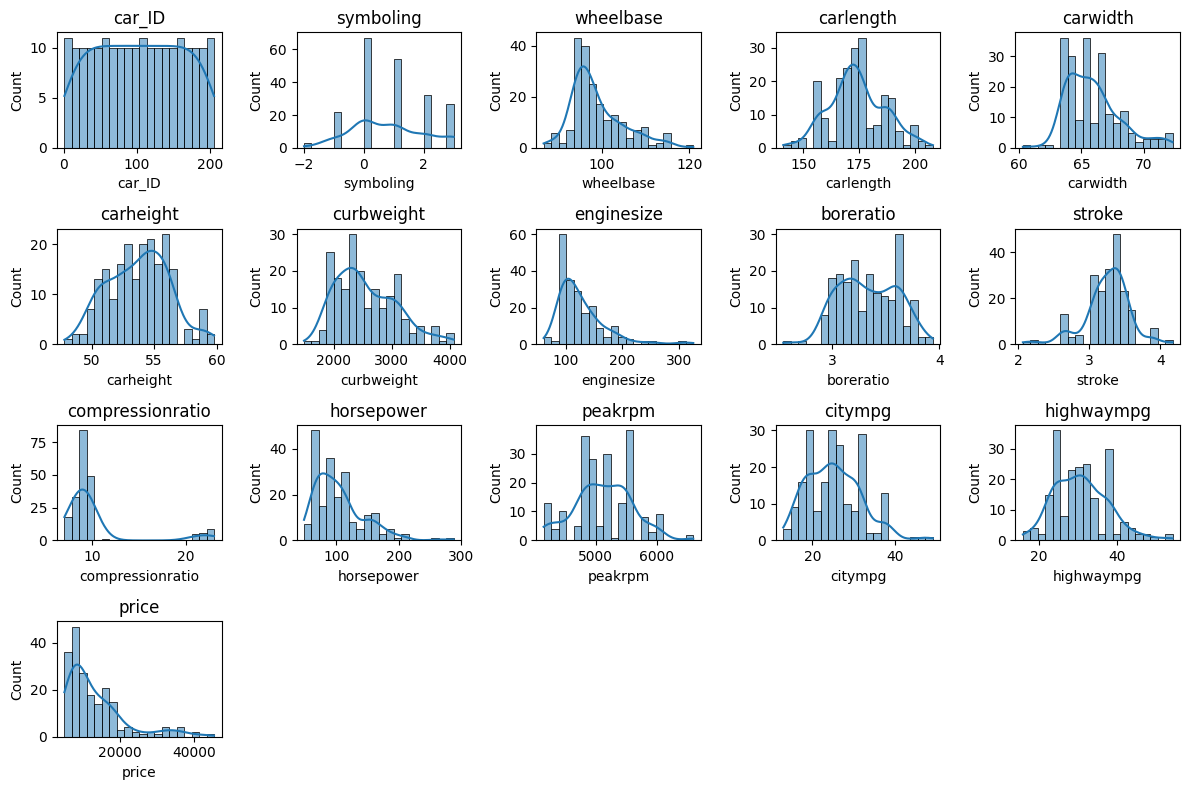

In [10]:
#–≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
numerical_visualization(df)

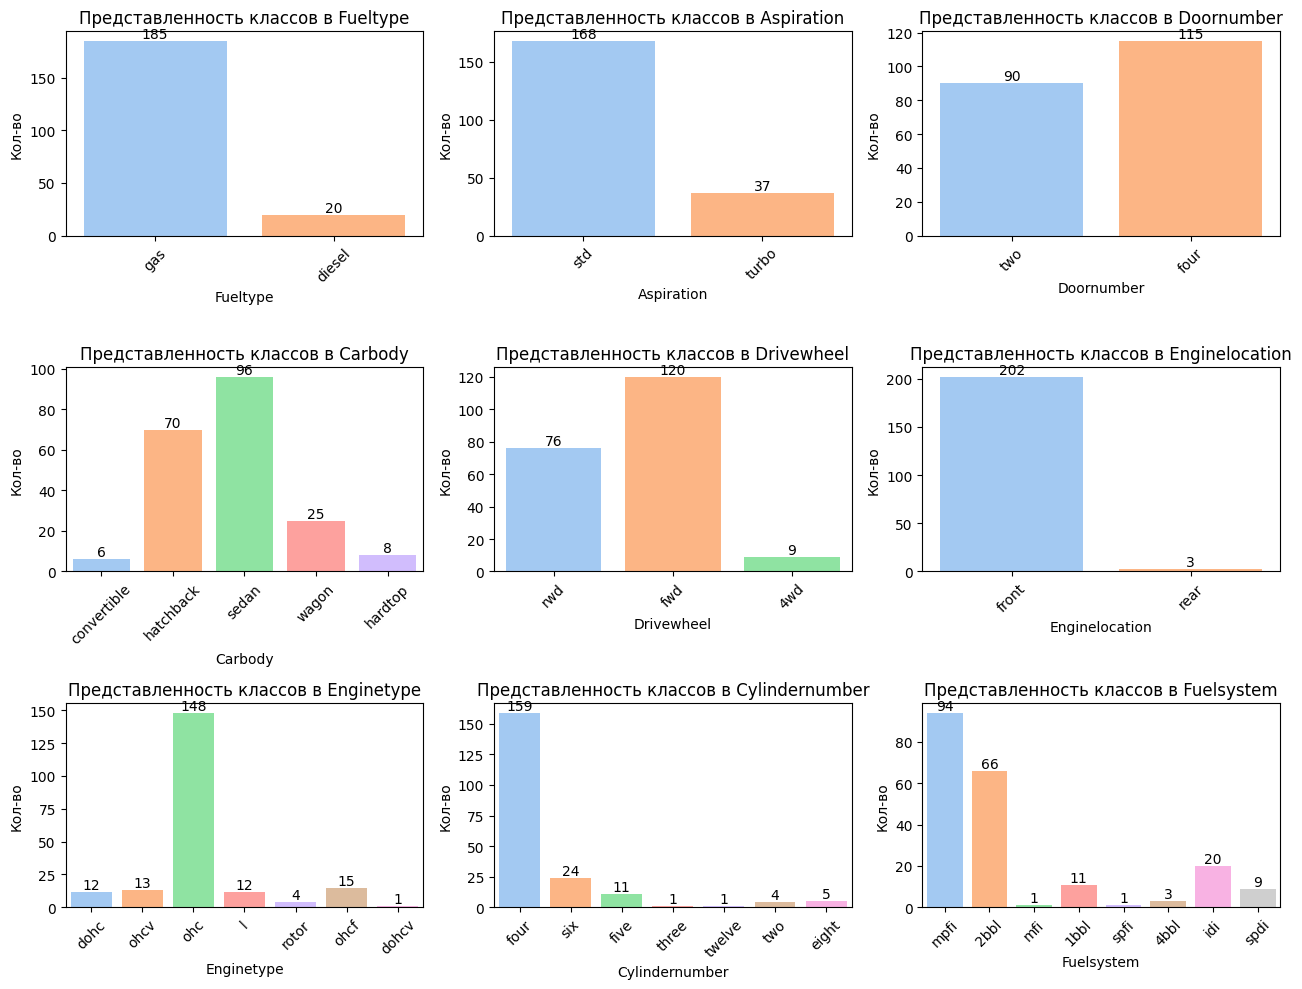

In [11]:
#–≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
categorial_visualization(df.drop("CarName",axis=1))

–ü—Ä–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±—ã–ª –∏—Å–∫–ª—é—á–µ–Ω –∏–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è —Å—Ç–æ–ª–±–µ—Ü CarName, —Ç–∞–∫ –∫–∞–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –æ—á–µ–Ω—å –º–Ω–æ–≥–æ. –ü–æ—ç—Ç–æ–º—É –æ—Ç–¥–µ–ª—å–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ç–æ–ø-20 —Å–∞–º—ã—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π

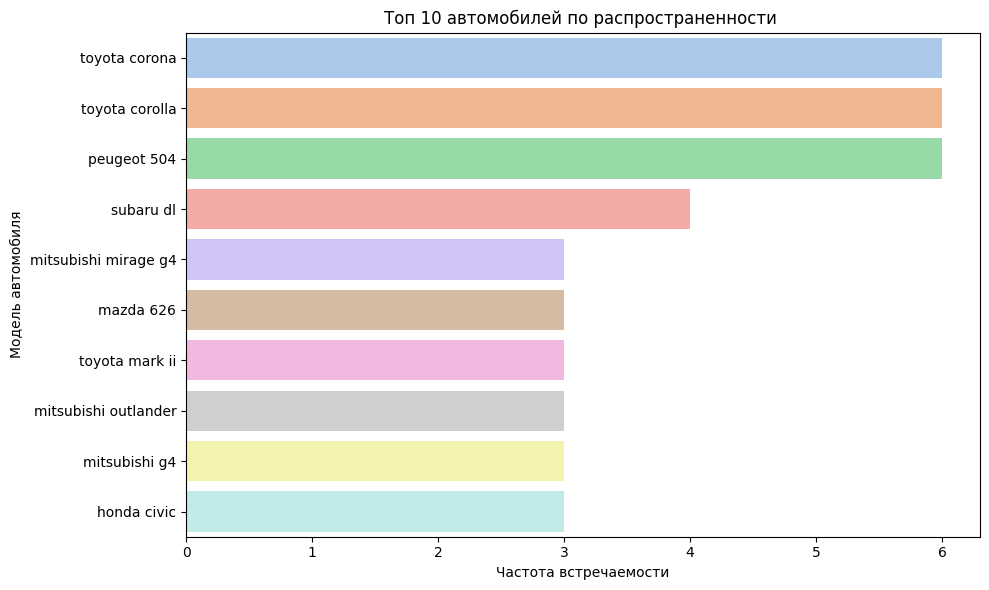

In [12]:
n = 10
top_car_models = df['CarName'].value_counts().head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette="pastel")
plt.title(f'–¢–æ–ø {n} –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω–æ—Å—Ç–∏ ')
plt.xlabel('–ß–∞—Å—Ç–æ—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏')
plt.ylabel('–ú–æ–¥–µ–ª—å –∞–≤—Ç–æ–º–æ–±–∏–ª—è')
plt.tight_layout()
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å —Å–∞–º—ã–º–∏ –≤—ã—Å–æ–∫–∏–º–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–º–∏ —Ü–µ–Ω–∞–º–∏

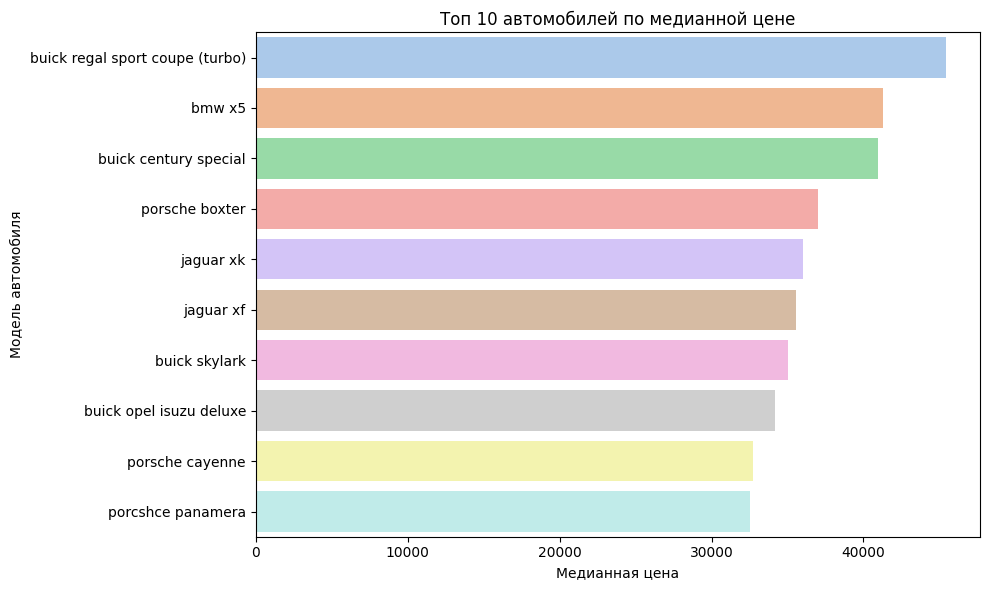

In [13]:
avg_prices_by_car = df.groupby('CarName')['price'].median().sort_values(ascending=False) 
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette="pastel")
plt.title(f'–¢–æ–ø {n} –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –ø–æ –º–µ–¥–∏–∞–Ω–Ω–æ–π —Ü–µ–Ω–µ')
plt.xlabel('–ú–µ–¥–∏–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞')
plt.ylabel('–ú–æ–¥–µ–ª—å –∞–≤—Ç–æ–º–æ–±–∏–ª—è')
plt.tight_layout()
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

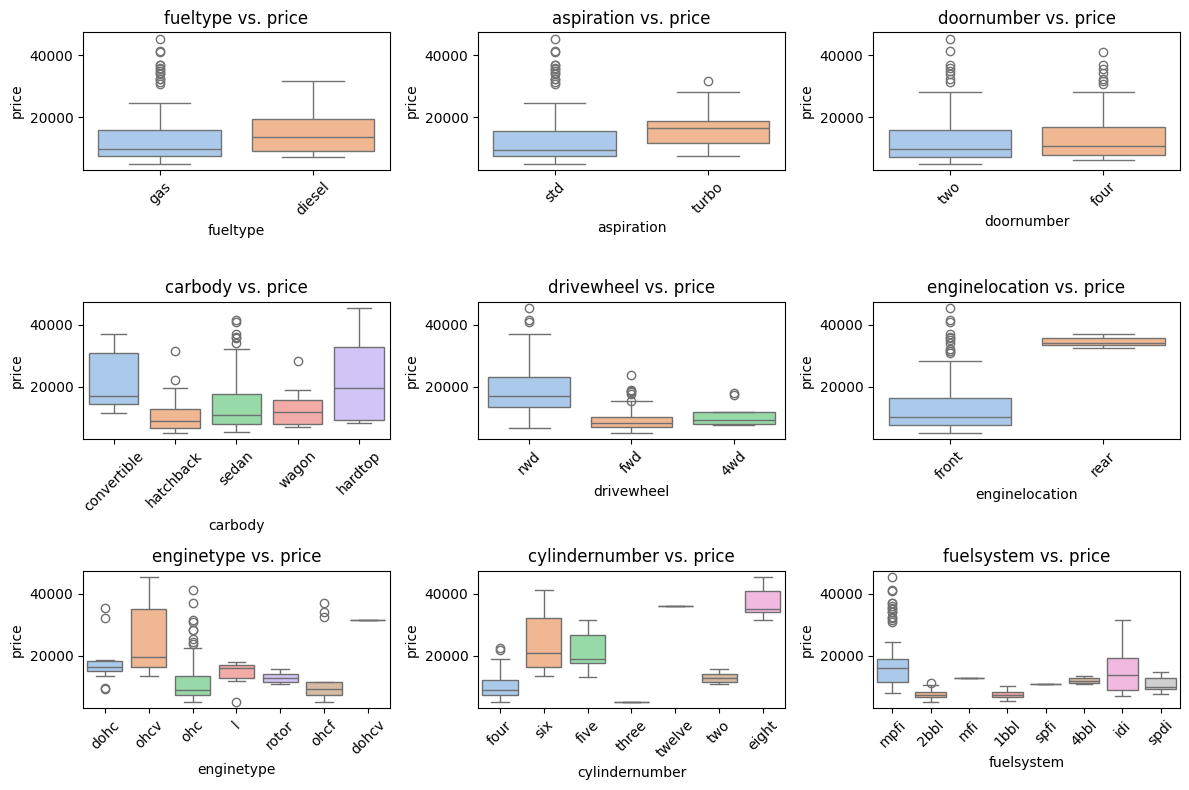

In [14]:
#—Ü–µ–Ω—ã 
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"price")

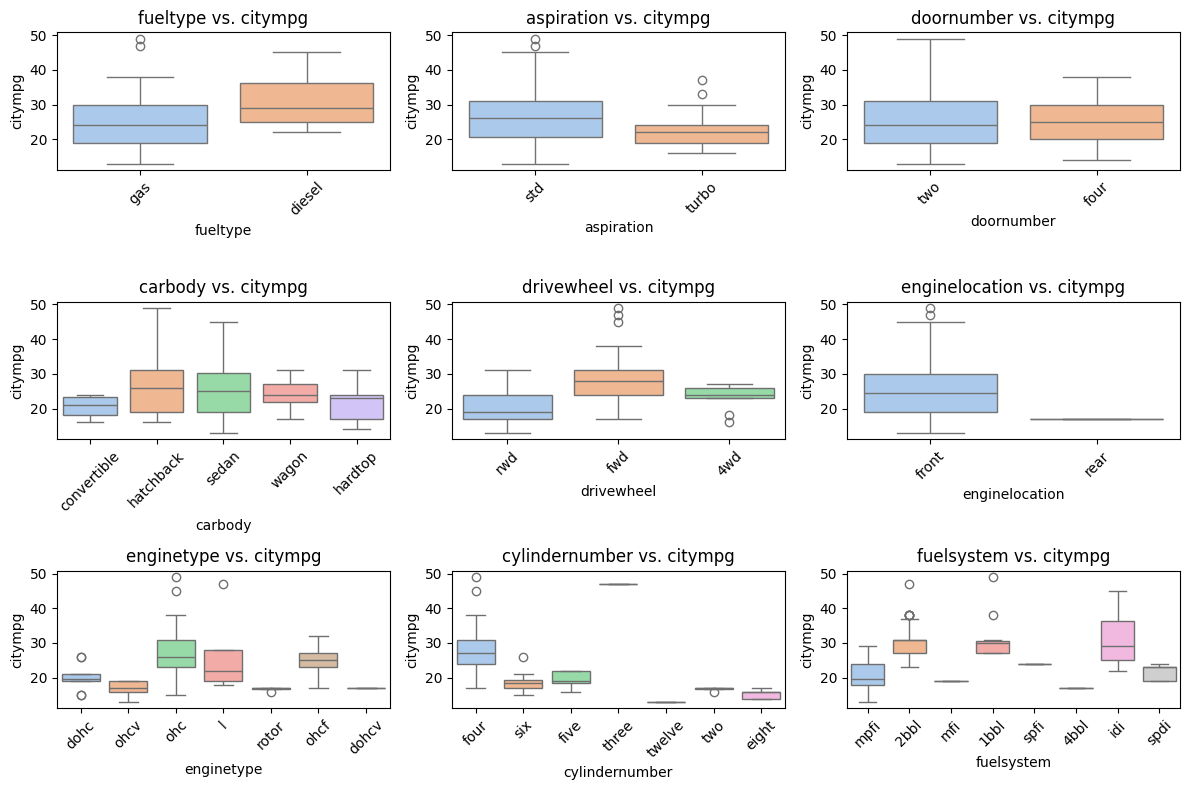

In [15]:
# mpg, —Ä–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"citympg")

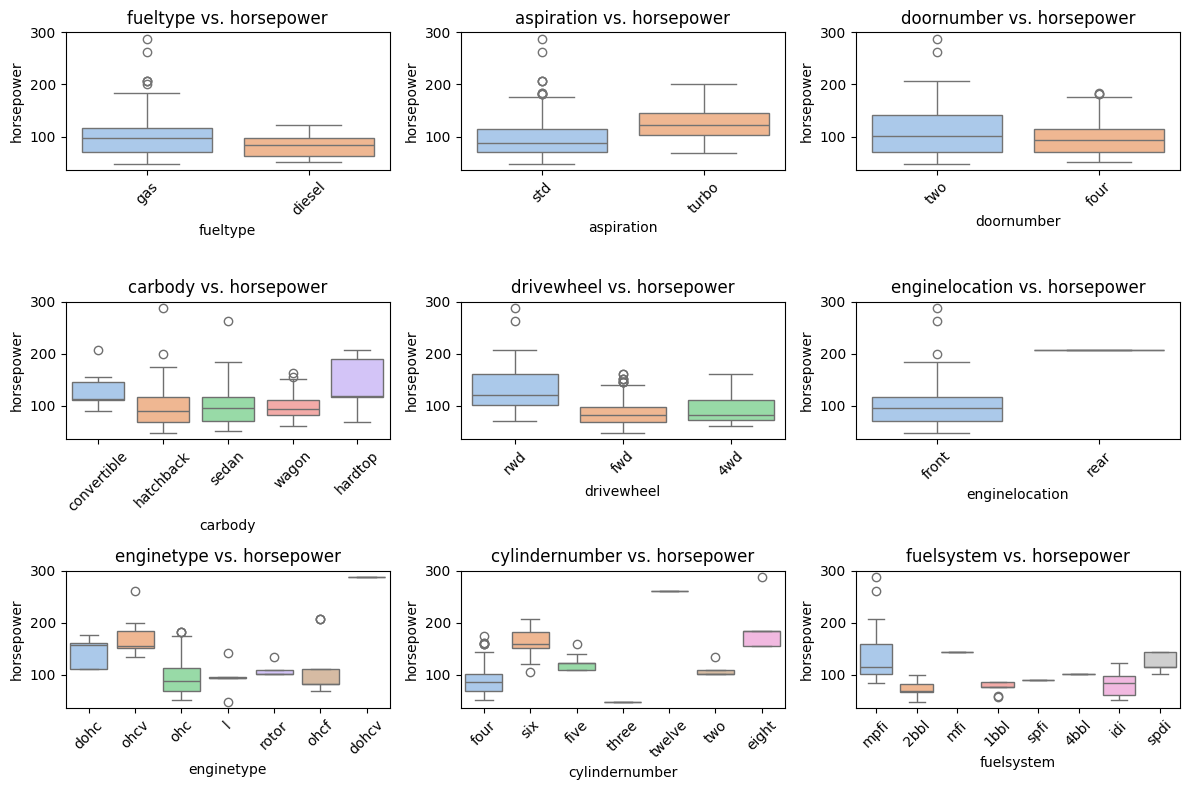

In [16]:
# –ª–æ—à–∞–¥–∏–Ω—ã–µ —Å–∏–ª—ã 
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"horsepower")

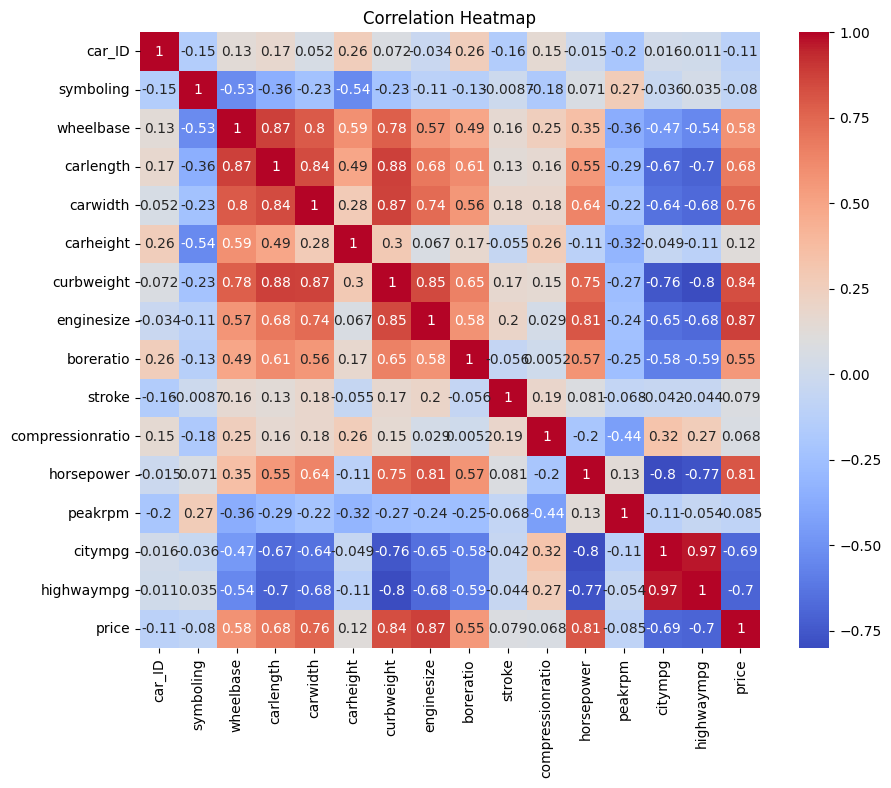

In [17]:
correlation_matrix(df)

## –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

### –†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π 
- –î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ 205 –º–æ–¥–µ–ª—è—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π, –∫–∞–∂–¥–∞—è –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∏–º–µ–µ—Ç —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏.
- –†–∞–∑–º–µ—Ä—ã, –≤–µ—Å –∏ –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª–µ–π —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.

### –î–∏–∞–ø–∞–∑–æ–Ω —Ü–µ–Ω 
- **–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞**: 5 118 –¥–æ–ª–ª–∞—Ä–æ–≤.
- **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞**: 45 400 –¥–æ–ª–ª–∞—Ä–æ–≤.
- **–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è**: –æ–∫–æ–ª–æ 13 276 –¥–æ–ª–ª–∞—Ä–æ–≤.

### –†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –¥–≤–∏–≥–∞—Ç–µ–ª–µ–π üõ†
- –î–≤–∏–≥–∞—Ç–µ–ª–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –¥–∏–∞–º–µ—Ç—Ä–æ–º —Ü–∏–ª–∏–Ω–¥—Ä–∞ (boreratio) –∏ –¥–ª–∏–Ω–æ–π —Ö–æ–¥–∞ –ø–æ—Ä—à–Ω—è (stroke).
- –†–µ–π—Ç–∏–Ω–≥–∏ —Ä–∏—Å–∫–∞ (symboling) –≤–∞—Ä—å–∏—Ä—É—é—Ç—Å—è –æ—Ç -2 –¥–æ 3.

### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö 
- –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ —à–∏—Ä–∏–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (carwidth), –≤–µ—Å (curbweight) –∏ –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è (enginesize), –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å.
- –í–æ–∑–º–æ–∂–Ω—ã –≤—ã–±—Ä–æ—Å—ã –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Å—Ç–µ–ø–µ–Ω–∏ —Å–∂–∞—Ç–∏—è (compressionratio) –∏ –º–æ—â–Ω–æ—Å—Ç–∏ –¥–≤–∏–≥–∞—Ç–µ–ª—è (horsepower).

---

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ üìäüîç

### –û—Å–Ω–æ–≤–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è:
- –î–∞—Ç–∞—Å–µ—Ç –æ —Ü–µ–Ω–∞—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å–æ–¥–µ—Ä–∂–∏—Ç **205 —Å—Ç—Ä–æ–∫ –∏ 26 —Å—Ç–æ–ª–±—Ü–æ–≤**.
- **–ù–µ—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π** .
- **–î—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç** .

### –¶–µ–Ω—ã –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ üí∞üí•
- **–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞**: 13 276 –¥–æ–ª–ª–∞—Ä–æ–≤ .
- **–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞**: 5 118 –¥–æ–ª–ª–∞—Ä–æ–≤ .
- **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞**: 45 400 –¥–æ–ª–ª–∞—Ä–æ–≤ .

### –ü–æ–ø—É–ª—è—Ä–Ω—ã–µ –º–∞—Ä–∫–∏
- –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å –≤ –¥–∞–Ω–Ω—ã—Ö ‚Äî **Toyota** .

### –¢–∏–ø —Ç–æ–ø–ª–∏–≤–∞
- –û–∫–æ–ª–æ **90% –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Ä–∞–±–æ—Ç–∞—é—Ç –Ω–∞ –±–µ–Ω–∑–∏–Ω–µ**, –ø—Ä–∏ —ç—Ç–æ–º –∏—Ö —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –Ω–∏–∂–µ, —á–µ–º —É –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –Ω–∞ –¥–∏–∑–µ–ª–µ. 
- –ê–≤—Ç–æ–º–æ–±–∏–ª–∏ –Ω–∞ –¥–∏–∑–µ–ª–µ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –æ–∫–æ–ª–æ **10%**, –Ω–æ –∏—Ö —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤—ã—à–µ. 

### –ù–∞–ª–∏—á–∏–µ —Ç—É—Ä–±–æ–Ω–∞–¥–¥—É–≤–∞
- –û–∫–æ–ª–æ **82% –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –±–µ–∑ —Ç—É—Ä–±–æ–Ω–∞–¥–¥—É–≤–∞**, –∏ –∏—Ö —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –Ω–∏–∂–µ. –¢—É—Ä–±–æ–Ω–∞–¥–¥—É–≤ –∏–º–µ—é—Ç –æ–∫–æ–ª–æ **18% –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π**. 

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–≤–µ—Ä–µ–π
- –ü—Ä–∏–º–µ—Ä–Ω–æ **56% –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –∏–º–µ—é—Ç 4 –¥–≤–µ—Ä–∏**, –∞ **46% ‚Äî 2 –¥–≤–µ—Ä–∏**. –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ —Å–ø–æ—Ä—Ç–∫–∞—Ä–æ–≤ –æ—Å—Ç–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ —Ç–æ–º –∂–µ —É—Ä–æ–≤–Ω–µ. 

### –¢–∏–ø—ã –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π
- –ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–π —Ç–∏–ø –∞–≤—Ç–æ–º–æ–±–∏–ª—è ‚Äî **—Å–µ–¥–∞–Ω**, –Ω–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã —Ç–∞–∫–∂–µ –±–æ–ª–µ–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–∏–ø—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ –∫–∞–±—Ä–∏–æ–ª–µ—Ç—ã –∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ —Å –∂–µ—Å—Ç–∫–æ–π –∫—Ä—ã—à–µ–π. 

### –ü—Ä–∏–≤–æ–¥
- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤—ã–±–∏—Ä–∞—é—Ç –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ —Å **–ø–µ—Ä–µ–¥–Ω–∏–º –ø—Ä–∏–≤–æ–¥–æ–º (fwd)**, —á—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –∏—Ö –±–æ–ª–µ–µ –Ω–∏–∑–∫–æ–π —Ü–µ–Ω–æ–π.

### –¢–∏–ø –¥–≤–∏–≥–∞—Ç–µ–ª—è
- –°–∞–º—ã–π —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–π —Ç–∏–ø –¥–≤–∏–≥–∞—Ç–µ–ª—è ‚Äî **"ohc"**, –∏ –æ–Ω —Å–≤—è–∑–∞–Ω —Å –±–æ–ª–µ–µ –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é.

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤
- –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª—è —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –æ–¥–Ω–∞–∫–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –∏–º–µ—é—Ç **4 —Ü–∏–ª–∏–Ω–¥—Ä–∞**.

### –†–∞–∑–º–µ—Ä –¥–≤–∏–≥–∞—Ç–µ–ª—è
- –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ –¥–≤–∏–≥–∞—Ç–µ–ª—è –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–æ—Å—Ç—É —Ü–µ–Ω—ã.

### –ì–∞–±–∞—Ä–∏—Ç—ã –∞–≤—Ç–æ–º–æ–±–∏–ª—è
- –ë–∞–∑–∞ –∫–æ–ª–µ—Å (wheelbase), –¥–ª–∏–Ω–∞ (car length) –∏ —à–∏—Ä–∏–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (car width) –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤—ã—Å–æ—Ç–∞ (car height) –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ –≤–ª–∏—è–Ω–∏—è –Ω–µ –æ–∫–∞–∑—ã–≤–∞–µ—Ç.


## –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥ 

In [18]:
# —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –Ω–∞ –±—Ä–µ–Ω–¥ –∏ –º–æ–¥–µ–ª—å
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [19]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

#–ø—Ä–∏–≤–æ–¥–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫ —á–∏—Å–ª–æ–≤–æ–º—É –≤–∏–¥—É
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑—É–µ–º
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [20]:
#–ë—É–¥–µ–º –∑–¥–µ—Å—å —Ö—Ä–∞–Ω–∏—Ç—å R-squared —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π
results={}

## –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è 

In [21]:
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
results["Linear_model"]=r2_square
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8615670883334448
Mean Squared Error: 10928450.669036347


In [23]:
model = linear_model.Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
results["Linear_model (L1)"]=r2_square
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8725502619115011
Mean Squared Error: 10061394.784765363


## –°–ª—É—á–∞–π–Ω–æ–µ –¥–µ—Ä–µ–≤–æ

–í—ã–±–µ—Ä–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã 

In [25]:
param_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [7, 12, 15, 20],
    "min_samples_split": [2, 5, 10],
    "criterion": ["squared_error"],
    "random_state": [42],}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error", 
    cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'criterion': 'squared_error',
 'max_depth': 12,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [26]:
y_pred = best_model.predict(X_test)

In [27]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
results["Random Forest"]=rf_r2
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R¬≤: {rf_r2:.2f}")

Random Forest MSE: 3545762.24
Random Forest R¬≤: 0.96


## –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ 

In [28]:
param_grid_gb = {
    "n_estimators": [20 , 50, 100],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "random_state": [42],
}
gb_model = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring="neg_mean_squared_error",
    cv=5)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
best_params_gb

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [29]:
y_pred = best_model_gb.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)
results["Gradient Boosting"]=r2_gb
print(f"Random Forest MSE: {rmse_gb:.2f}")
print(f"Random Forest R¬≤: {r2_gb:.2f}")

Random Forest MSE: 4088468.64
Random Forest R¬≤: 0.95


## –í—ã–≤–æ–¥—ã 

Text(0, 0.5, 'R-squared')

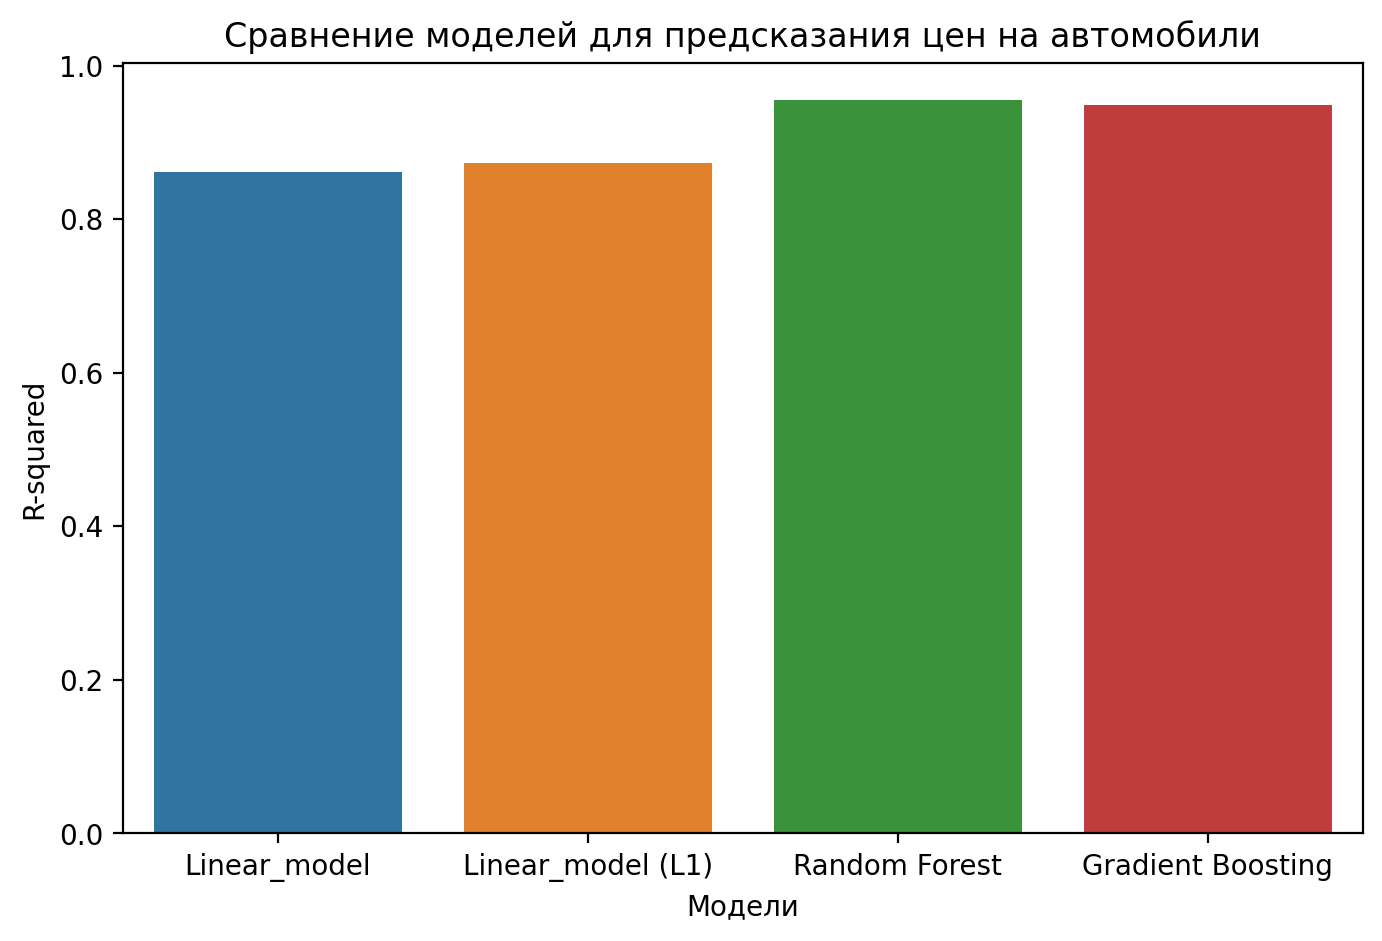

In [30]:
plt.figure(figsize=(8, 5),dpi=200)
sns.barplot(pd.DataFrame([results]))
plt.title("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–Ω –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏")
plt.xlabel("–ú–æ–¥–µ–ª–∏")
plt.ylabel("R-squared")